In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
train = pd.read_csv('train.csv')
train_helper = pd.read_csv('train_helper.csv')
test = pd.read_csv('test.csv')
test_helper = pd.read_csv('test_helper.csv')

# Data Cleaning 

In [4]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474,A,BA1,BB425559,PD44707,CC1,CP0,0,2020-03-21 00:00:00
1,CUID5533,TID244499,EID1459012,393.45200,2020-04-28 07:17:12,33227,A,BA4793,BB248012,PD39453,CC1,CP0,0,2020-04-28 00:00:00
2,CUID5278,TID311877,EID0,375.75000,2020-08-15 04:11:43,0,F,BA5631,BB166256,PD237664,CC1,CP0,0,NaN
3,CUID24,TID279685,EID0,6.97225,2020-06-26 01:11:42,0,C,BA7188,BB354924,PD99032,CC1,CP0,0,NaN
4,CUID449,TID104689,EID0,16.70000,2020-09-15 10:11:06,0,C,BA7236,BB354924,PD63422,CC1,CP0,0,NaN


In [5]:
train_helper.head()

,V1,V3,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID1626,EID1390067,B170291,A,2017-11-18 05:26:58,117.167.140.162,875,1525792,77.55,NaN
1,CUID2932,EID397864,B170291,A,2017-11-18 05:26:59,133.193.46.52,875,471293,-25.85,NaN
2,CUID7230,EID315534,B1827073,B,2017-11-18 05:27:02,127.75.140.137,875,825535,NaN,373.50
3,CUID1588,EID1724187,B170291,A,2017-11-18 05:27:30,120.210.191.123,875,2136427,-23.50,NaN
4,CUID3625,EID637357,B2356022,B,2017-11-18 05:27:55,127.75.145.110,875,825535,169.20,400.06


In [6]:
train.shape

(233633, 14)

In [7]:
train_helper.shape

(1231200, 10)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233633 entries, 0 to 233632
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      233633 non-null  object 
 1   V2      233633 non-null  object 
 2   V3      233633 non-null  object 
 3   V4      233633 non-null  float64
 4   V5      233633 non-null  object 
 5   V6      233633 non-null  int64  
 6   V7      233633 non-null  object 
 7   V8      233633 non-null  object 
 8   V9      233633 non-null  object 
 9   V10     233633 non-null  object 
 10  V11     233633 non-null  object 
 11  V12     233633 non-null  object 
 12  Target  233633 non-null  int64  
 13  V13     231762 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 25.0+ MB


In [9]:
train.isnull().sum()

V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
Target       0
V13       1871
dtype: int64

In [10]:
def column_info(train, features):
    categorical_features = []
    for feature in features:
        unique_values = train[feature].unique()
        missing_percentage = train[feature].isnull().mean() * 100
        num_unique_values = len(unique_values)
        is_categorical = train[feature].dtype == 'object' or train[feature].nunique() < 20

        print(f"Column: '{feature}'")
        print(f"Number of unique values: {num_unique_values}")
        print("Unique values:")
        print(unique_values)
        print(f"Missing value percentage: {missing_percentage:.2f}%")
        print(f"Categorical: {'Yes' if is_categorical else 'No'}")
        print("-----------------------------------------------------------------------------------------")

        if is_categorical:
            categorical_features.append(feature)

    return categorical_features

# Example usage:
# Assuming you have a DataFrame named 'train' and a list of feature names named 'features'
features = train.columns
categorical_features = column_info(train, features)

Column: 'V1'
Number of unique values: 3684
Unique values:
['CUID1872' 'CUID5533' 'CUID5278' ... 'CUID5687' 'CUID6896' 'CUID4557']
Missing value percentage: 0.00%
Categorical: Yes
-----------------------------------------------------------------------------------------
Column: 'V2'
Number of unique values: 233633
Unique values:
['TID229526' 'TID244499' 'TID311877' ... 'TID318682' 'TID9480' 'TID158744']
Missing value percentage: 0.00%
Categorical: Yes
-----------------------------------------------------------------------------------------
Column: 'V3'
Number of unique values: 206627
Unique values:
['EID2062082' 'EID1459012' 'EID0' ... 'EID1776806' 'EID631635'
 'EID1368225']
Missing value percentage: 0.00%
Categorical: Yes
-----------------------------------------------------------------------------------------
Column: 'V4'
Number of unique values: 16207
Unique values:
[ 485.69445  393.452    375.75    ...   58.84245   82.7151  2228.57325]
Missing value percentage: 0.00%
Categorical: No


Here are the observations that i found on **train dataset**
1. Only **V13** column has missing values 0.8%
2. **V1, V2 and V3** are Id related columns, we can drop these, but we can also convert them to numerical and then analyse if any particular acc or id has more frauds happening at the same time
4. **V4** is looks like Transaction Amount feature and also it have No null values
5. **V5** and **V13** are timestamp columns have time.
6. **['V1','V2','V3','V5','V7','V8','V9','V10','V11','V12','Target','V13']** these all are categorical features
7. 12 out of 14 are categorical features
8. **V11** has only 1 value so we can drop it
9. Target feature has two unique values 0 and 1 , 0 for non fraud and 1 for fraud
10. **V10, V9, V8, V12** are like id columns so these can also be dropped or can be converted 

In [11]:
train.drop(columns=['V11', 'V12'],inplace=True,axis=1)

In [12]:
train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Target,V13
0,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474,A,BA1,BB425559,PD44707,0,2020-03-21 00:00:00
1,CUID5533,TID244499,EID1459012,393.45200,2020-04-28 07:17:12,33227,A,BA4793,BB248012,PD39453,0,2020-04-28 00:00:00
2,CUID5278,TID311877,EID0,375.75000,2020-08-15 04:11:43,0,F,BA5631,BB166256,PD237664,0,NaN
3,CUID24,TID279685,EID0,6.97225,2020-06-26 01:11:42,0,C,BA7188,BB354924,PD99032,0,NaN
4,CUID449,TID104689,EID0,16.70000,2020-09-15 10:11:06,0,C,BA7236,BB354924,PD63422,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
233628,CUID449,TID325283,EID430976,41.75000,2020-09-06 03:42:03,391083,A,BA431477,BB282621,PD206909,0,2019-02-03 00:00:00
233629,CUID449,TID314228,EID2012983,83.50000,2020-08-19 04:43:01,391083,A,BA431477,BB282621,PD206909,0,2019-02-03 00:00:00
233630,CUID449,TID318682,EID1776806,41.75000,2020-08-26 05:51:17,391083,A,BA431477,BB282621,PD206909,0,2019-02-03 00:00:00
233631,CUID449,TID9480,EID631635,167.00000,2020-04-15 20:35:21,53,E,BA447678,BB447445,PD0,0,2020-04-16 00:00:00


In [13]:
train['V5'] = pd.to_datetime(train['V5']);
train['V13'] = pd.to_datetime(train['V13'], errors = 'coerce')

In [14]:
train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Target,V13
0,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474,A,BA1,BB425559,PD44707,0,2020-03-21
1,CUID5533,TID244499,EID1459012,393.45200,2020-04-28 07:17:12,33227,A,BA4793,BB248012,PD39453,0,2020-04-28
2,CUID5278,TID311877,EID0,375.75000,2020-08-15 04:11:43,0,F,BA5631,BB166256,PD237664,0,NaT
3,CUID24,TID279685,EID0,6.97225,2020-06-26 01:11:42,0,C,BA7188,BB354924,PD99032,0,NaT
4,CUID449,TID104689,EID0,16.70000,2020-09-15 10:11:06,0,C,BA7236,BB354924,PD63422,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
233628,CUID449,TID325283,EID430976,41.75000,2020-09-06 03:42:03,391083,A,BA431477,BB282621,PD206909,0,2019-02-03
233629,CUID449,TID314228,EID2012983,83.50000,2020-08-19 04:43:01,391083,A,BA431477,BB282621,PD206909,0,2019-02-03
233630,CUID449,TID318682,EID1776806,41.75000,2020-08-26 05:51:17,391083,A,BA431477,BB282621,PD206909,0,2019-02-03
233631,CUID449,TID9480,EID631635,167.00000,2020-04-15 20:35:21,53,E,BA447678,BB447445,PD0,0,2020-04-16


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233633 entries, 0 to 233632
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   V1      233633 non-null  object        
 1   V2      233633 non-null  object        
 2   V3      233633 non-null  object        
 3   V4      233633 non-null  float64       
 4   V5      233633 non-null  datetime64[ns]
 5   V6      233633 non-null  int64         
 6   V7      233633 non-null  object        
 7   V8      233633 non-null  object        
 8   V9      233633 non-null  object        
 9   V10     233633 non-null  object        
 10  Target  233633 non-null  int64         
 11  V13     231762 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(7)
memory usage: 21.4+ MB


In [16]:
train["V5_year"] = train["V5"].dt.year
train["V5_month"] = train["V5"].dt.month
train["V5_day"] = train["V5"].dt.day
train["V5_hour"] = train["V5"].dt.hour
train["V5_min"] = train["V5"].dt.minute
train["V5_sec"] = train["V5"].dt.second
train['is_weekend'] = train['V5'].dt.weekday >= 5
train['season'] = (train['V5'].dt.month%12 + 3)//3

In [17]:
train.drop(columns=['V5'],inplace=True)

In [18]:
train.head(10)

,V1,V2,V3,V4,V6,V7,V8,V9,V10,Target,V13,V5_year,V5_month,V5_day,V5_hour,V5_min,V5_sec,is_weekend,season
0,CUID1872,TID229526,EID2062082,485.69445,376474,A,BA1,BB425559,PD44707,0,2020-03-21,2020,3,20,22,51,30,False,2
1,CUID5533,TID244499,EID1459012,393.45200,33227,A,BA4793,BB248012,PD39453,0,2020-04-28,2020,4,28,7,17,12,False,2
2,CUID5278,TID311877,EID0,375.75000,0,F,BA5631,BB166256,PD237664,0,NaT,2020,8,15,4,11,43,True,3
3,CUID24,TID279685,EID0,6.97225,0,C,BA7188,BB354924,PD99032,0,NaT,2020,6,26,1,11,42,False,3
4,CUID449,TID104689,EID0,16.70000,0,C,BA7236,BB354924,PD63422,0,NaT,2020,9,15,10,11,6,False,4
5,CUID449,TID15835,EID0,15.03000,0,C,BA7236,BB354924,PD63422,0,NaT,2020,4,27,3,11,20,False,2
6,CUID6757,TID65730,EID0,18.78750,0,C,BA8649,BB158648,PD366146,0,NaT,2020,7,16,10,11,46,False,3
7,CUID1381,TID420679,EID0,375.75000,0,F,BA8650,BB100097,PD394846,0,NaT,2020,8,13,6,11,14,False,3
8,CUID1381,TID6634,EID0,125.25000,0,F,BA8650,BB100097,PD394846,0,NaT,2020,4,7,21,11,5,False,2
9,CUID1381,TID320776,EID0,41.75000,0,F,BA8650,BB100097,PD394846,0,NaT,2020,8,30,2,11,15,True,3


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
train['V7'] = encoder.fit_transform(train['V7'])
train

,V1,V2,V3,V4,V6,V7,V8,V9,V10,Target,V13,V5_year,V5_month,V5_day,V5_hour,V5_min,V5_sec,is_weekend,season
0,CUID1872,TID229526,EID2062082,485.69445,376474,0,BA1,BB425559,PD44707,0,2020-03-21,2020,3,20,22,51,30,False,2
1,CUID5533,TID244499,EID1459012,393.45200,33227,0,BA4793,BB248012,PD39453,0,2020-04-28,2020,4,28,7,17,12,False,2
2,CUID5278,TID311877,EID0,375.75000,0,5,BA5631,BB166256,PD237664,0,NaT,2020,8,15,4,11,43,True,3
3,CUID24,TID279685,EID0,6.97225,0,2,BA7188,BB354924,PD99032,0,NaT,2020,6,26,1,11,42,False,3
4,CUID449,TID104689,EID0,16.70000,0,2,BA7236,BB354924,PD63422,0,NaT,2020,9,15,10,11,6,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233628,CUID449,TID325283,EID430976,41.75000,391083,0,BA431477,BB282621,PD206909,0,2019-02-03,2020,9,6,3,42,3,True,4
233629,CUID449,TID314228,EID2012983,83.50000,391083,0,BA431477,BB282621,PD206909,0,2019-02-03,2020,8,19,4,43,1,False,3
233630,CUID449,TID318682,EID1776806,41.75000,391083,0,BA431477,BB282621,PD206909,0,2019-02-03,2020,8,26,5,51,17,False,3
233631,CUID449,TID9480,EID631635,167.00000,53,4,BA447678,BB447445,PD0,0,2020-04-16,2020,4,15,20,35,21,False,2


In [21]:
# Columns to clean
columns_to_clean = ['V1', 'V2', 'V3', 'V8', 'V9', 'V10']

# Remove alphabetic characters from the specified columns
train[columns_to_clean] = train[columns_to_clean].applymap(lambda x: ''.join(filter(str.isdigit, str(x))))

C:\Users\Nayak\AppData\Local\Temp\ipykernel_3952\3023149406.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train[columns_to_clean] = train[columns_to_clean].applymap(lambda x: ''.join(filter(str.isdigit, str(x))))


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233633 entries, 0 to 233632
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   V1          233633 non-null  object        
 1   V2          233633 non-null  object        
 2   V3          233633 non-null  object        
 3   V4          233633 non-null  float64       
 4   V6          233633 non-null  int64         
 5   V7          233633 non-null  int32         
 6   V8          233633 non-null  object        
 7   V9          233633 non-null  object        
 8   V10         233633 non-null  object        
 9   Target      233633 non-null  int64         
 10  V13         231762 non-null  datetime64[ns]
 11  V5_year     233633 non-null  int32         
 12  V5_month    233633 non-null  int32         
 13  V5_day      233633 non-null  int32         
 14  V5_hour     233633 non-null  int32         
 15  V5_min      233633 non-null  int32         
 16  V5

In [23]:
# Columns to Clean 
columnns_to_clean = ['V1', 'V2', 'V3', 'V8', 'V9', 'V10']

train[columnns_to_clean] = train[columnns_to_clean].apply(pd.to_numeric)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233633 entries, 0 to 233632
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   V1          233633 non-null  int64         
 1   V2          233633 non-null  int64         
 2   V3          233633 non-null  int64         
 3   V4          233633 non-null  float64       
 4   V6          233633 non-null  int64         
 5   V7          233633 non-null  int32         
 6   V8          233633 non-null  int64         
 7   V9          233633 non-null  int64         
 8   V10         233633 non-null  int64         
 9   Target      233633 non-null  int64         
 10  V13         231762 non-null  datetime64[ns]
 11  V5_year     233633 non-null  int32         
 12  V5_month    233633 non-null  int32         
 13  V5_day      233633 non-null  int32         
 14  V5_hour     233633 non-null  int32         
 15  V5_min      233633 non-null  int32         
 16  V5

In [25]:
train.head()

,V1,V2,V3,V4,V6,V7,V8,V9,V10,Target,V13,V5_year,V5_month,V5_day,V5_hour,V5_min,V5_sec,is_weekend,season
0,1872,229526,2062082,485.69445,376474,0,1,425559,44707,0,2020-03-21,2020,3,20,22,51,30,False,2
1,5533,244499,1459012,393.45200,33227,0,4793,248012,39453,0,2020-04-28,2020,4,28,7,17,12,False,2
2,5278,311877,0,375.75000,0,5,5631,166256,237664,0,NaT,2020,8,15,4,11,43,True,3
3,24,279685,0,6.97225,0,2,7188,354924,99032,0,NaT,2020,6,26,1,11,42,False,3
4,449,104689,0,16.70000,0,2,7236,354924,63422,0,NaT,2020,9,15,10,11,6,False,4


### Target

In [26]:
# Count the occurrences of each unique value in the 'Target' column of the train_data dataframe.
train['Target'].value_counts()

Target
0    232343
1      1290
Name: count, dtype: int64

C:\Users\Nayak\AppData\Local\Temp\ipykernel_3952\3421208436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)


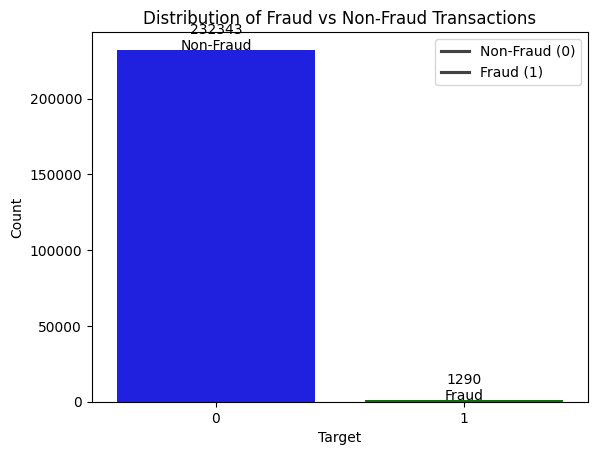

In [27]:
value_counts = train['Target'].value_counts()
colors = ['blue', 'green']
sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors)
for i, count in enumerate(value_counts.values):
    plt.text(i, count + 10, f"{count}\n{'Non-Fraud' if value_counts.index[i] == 0 else 'Fraud'}", ha='center')
plt.legend(['Non-Fraud (0)', 'Fraud (1)'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()

**The value 0 appears 232,343 times.**

**The value 1 appears 1,290 times.**

**This indicates that out of all the transactions in the DataFrame**

**232,343 transactions are labeled as non-fraud (Target = 0)**

**1,290 transactions are labeled as fraud (Target = 1)**

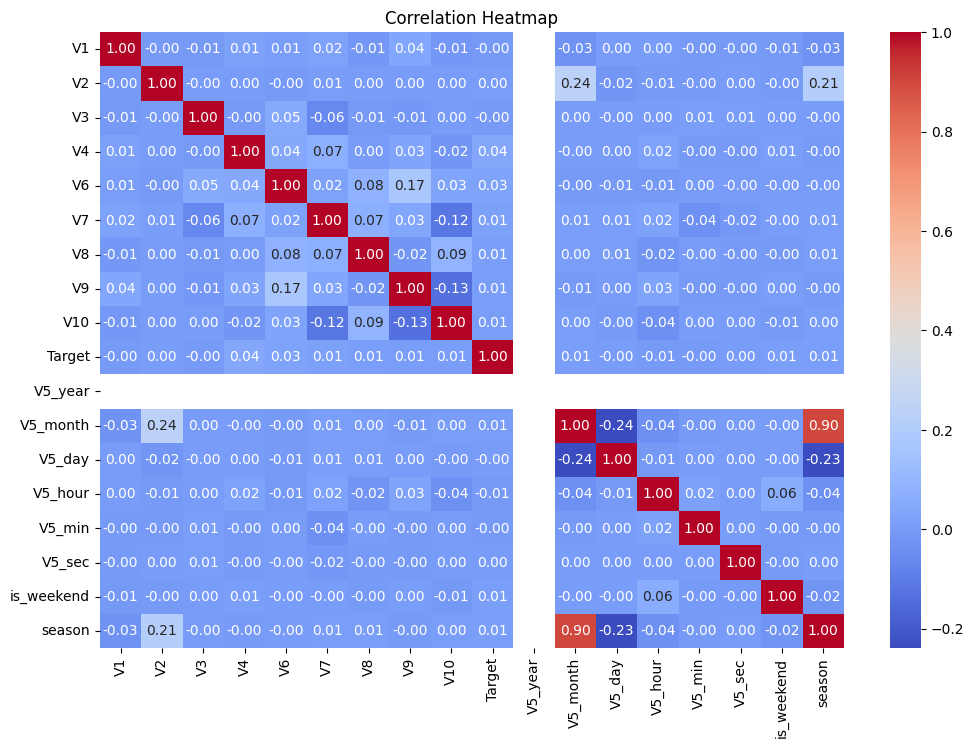

In [28]:
#corelation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


A strong positive correlation in a heatmap refers to a relationship where the correlation value is close to +1, typically between 0.8 and 1.0. This indicates that as one variable increases, the other variable almost always increases as well. In heatmaps, such strong positive correlations are usually represented by dark red or bright red shades, depending on the color scheme. A common example is the relationship between height and weight in the general population, where taller individuals tend to weigh more.

On the other hand, a weak positive correlation has a value closer to 0 but still positive, usually ranging from 0.1 to 0.4. This means that as one variable increases, the other might also increase, but the relationship is not strong or consistent. In heatmaps, weak positive correlations are often shown using lighter shades of red or pink.

### Here are the key takeaways from the heatmap analysis. 
1. The features **V4, V6, and V7** show **weak positive correlations** with the Target variable, with correlation values ranging approximately from 0.04 to 0.07. This indicates that none of the features individually exhibit a strong linear relationship with the **likelihood of fraud**. As a result, relying solely on these features for predictive modeling may not yield effective results. To improve model performance, it would be beneficial to explore advanced techniques such as feature engineering, using non-linear models like XGBoost or LightGBM, and incorporating interaction terms that can capture more complex patterns in the data.
2. The features **V5_month and season** exhibit a strong positive correlation of **0.90**, and **V5_year** also shows a high correlation with season. This suggests the presence of multicollinearity, meaning these features may carry overlapping or redundant information. In such cases, it's advisable to either drop one of the highly correlated features or apply dimensionality reduction techniques like **Principal Component Analysis (PCA)** to simplify the dataset without losing valuable information.

In [29]:
train.drop(columns=['season'],inplace=True)

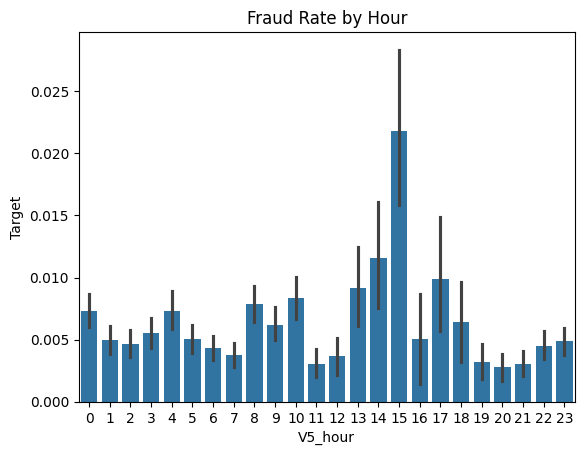

In [30]:
#Fraud by hour of the day
sns.barplot(x='V5_hour', y='Target', data=train)
plt.title("Fraud Rate by Hour")
plt.show()

**Above is the barplot that shows me at what hour is the rate of fraud more in the whole dataset**

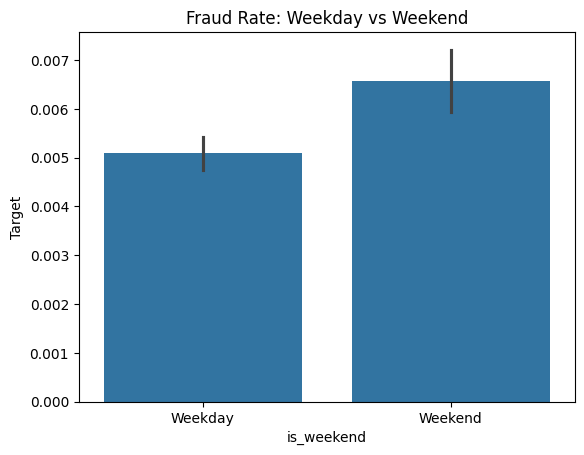

In [31]:
#fraud by weekends
sns.barplot(x='is_weekend', y='Target', data=train)
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.title("Fraud Rate: Weekday vs Weekend")
plt.show()

**Above is the barplot that shows the rate of frauds when it is weekend and weekday**

NameError: name 'Patch' is not defined

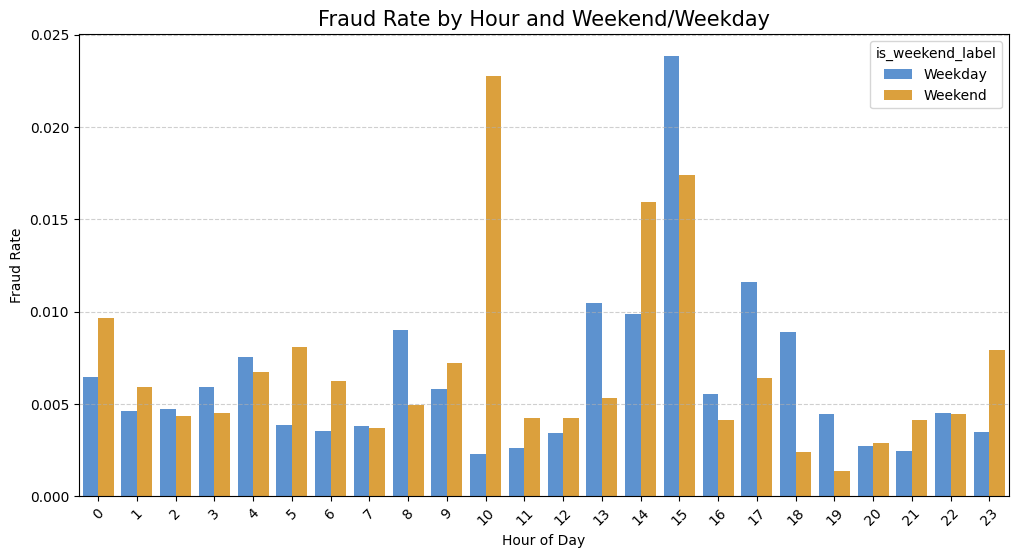

In [32]:
# Create a combined column with hour and weekend status
train['hour_weekend'] = train['V5_hour'].astype(str) + '_' + train['is_weekend'].astype(int).astype(str)

# Group by and calculate fraud rate
fraud_rate = train.groupby('hour_weekend')['Target'].mean().reset_index()

# Split the hour_weekend back into separate columns
fraud_rate[['hour', 'is_weekend']] = fraud_rate['hour_weekend'].str.split('_', expand=True).astype(int)

# Map 0 -> Weekday, 1 -> Weekend
fraud_rate['is_weekend_label'] = fraud_rate['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

# Plot
plt.figure(figsize=(12, 6))
palette = {'Weekday': '#4A90E2', 'Weekend': '#F5A623'}
sns.barplot(x='hour', y='Target', hue='is_weekend_label', data=fraud_rate, palette=palette)

# Labels and title
plt.title('Fraud Rate by Hour and Weekend/Weekday', fontsize=15)
plt.ylabel('Fraud Rate')
plt.xlabel('Hour of Day')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

# Custom legend (optional, since hue now already shows words)
legend_elements = [
    Patch(facecolor='#4A90E2', label='Weekday'),
    Patch(facecolor='#F5A623', label='Weekend')
]
plt.legend(handles=legend_elements, title='Day Type', fontsize=11, title_fontsize=13)

plt.tight_layout()
plt.show()

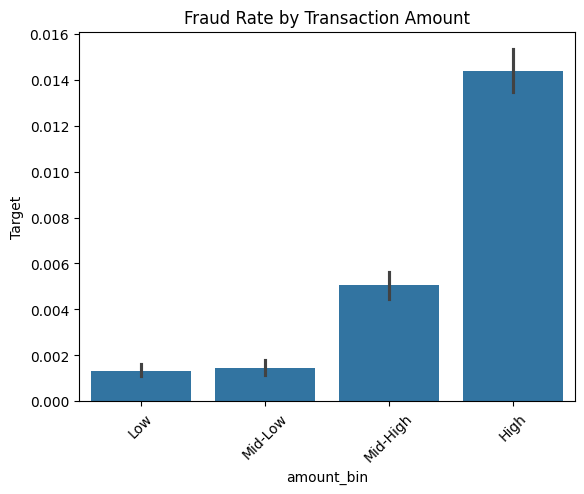

In [33]:
#Do small or very large transactions have higher fraud likelihood?

train['amount_bin'] = pd.qcut(train['V4'], q=4, labels=["Low", "Mid-Low", "Mid-High", "High"]) # Quartiles
sns.barplot(x='amount_bin', y='Target', data=train)
plt.title("Fraud Rate by Transaction Amount")
plt.xticks(rotation=45)
plt.show()  

(0.00735, 12.525) --> Q1: Smallest 25% of values

(12.525, 33.4) --> Q2: 25%–50%

(33.4, 115.23) --> Q3: 50%–75%

(115.23, 41750.0) --> Q4: Largest 25% (this is where fraud seems most likely!)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'High_False'),
  Text(1, 0, 'High_True'),
  Text(2, 0, 'Low_False'),
  Text(3, 0, 'Low_True'),
  Text(4, 0, 'Mid-High_False'),
  Text(5, 0, 'Mid-High_True'),
  Text(6, 0, 'Mid-Low_False'),
  Text(7, 0, 'Mid-Low_True')])

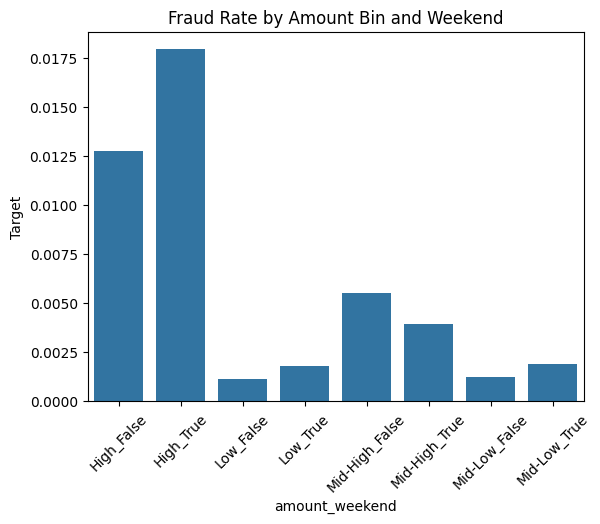

In [34]:
#combine amount_bin with is_weekend or V5_hour

train['amount_weekend'] = train['amount_bin'].astype(str) + '_' + train['is_weekend'].astype(str)
grouped = train.groupby('amount_weekend')['Target'].mean().reset_index()
sns.barplot(x='amount_weekend', y='Target', data=grouped)
plt.title("Fraud Rate by Amount Bin and Weekend")
plt.xticks(rotation=45)

**here false means weekday and false means weekend and high means high transaction amount nad low means low transaction amount**    

C:\Users\Nayak\AppData\Local\Temp\ipykernel_3952\3389976159.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = train.pivot_table(index='amount_bin', columns='is_weekend', values='Target', aggfunc='mean')


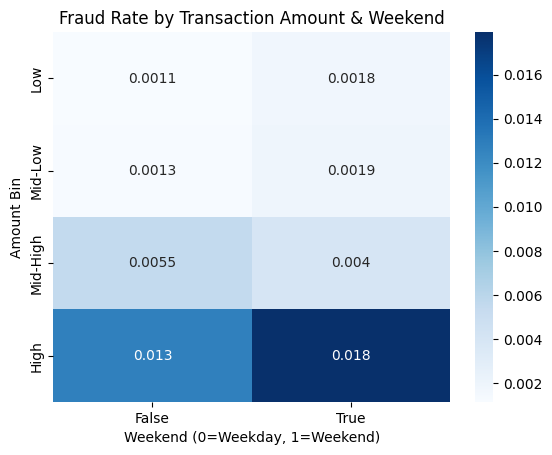

In [35]:
#This will show how fraud patterns differ on weekends vs weekdays across amount bins.

pivot = train.pivot_table(index='amount_bin', columns='is_weekend', values='Target', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='Blues')
plt.title("Fraud Rate by Transaction Amount & Weekend")
plt.ylabel("Amount Bin")
plt.xlabel("Weekend (0=Weekday, 1=Weekend)")
plt.show()


C:\Users\Nayak\AppData\Local\Temp\ipykernel_3952\1391462918.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train[train['Target'] == 0], x='V7', label='Not Fraud', shade=True)
C:\Users\Nayak\AppData\Local\Temp\ipykernel_3952\1391462918.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train[train['Target'] == 1], x='V7', label='Fraud', shade=True)


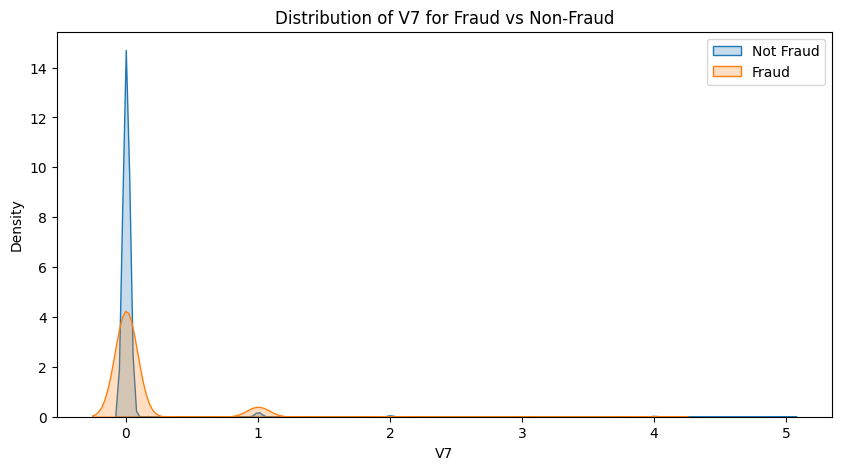

In [36]:
#Distribution of V7 for Fraud vs Non-Fraud

plt.figure(figsize=(10,5))
sns.kdeplot(data=train[train['Target'] == 0], x='V7', label='Not Fraud', shade=True)
sns.kdeplot(data=train[train['Target'] == 1], x='V7', label='Fraud', shade=True)
plt.title("Distribution of V7 for Fraud vs Non-Fraud")
plt.legend()
plt.show()

Yeah i did this to see if V7 has a big role in deciding role, but it shows in the KDE plot that all the fraud and non fraud values are concentrated at low v7 values, there is some differences that can be added in the model, but its not the best feature.

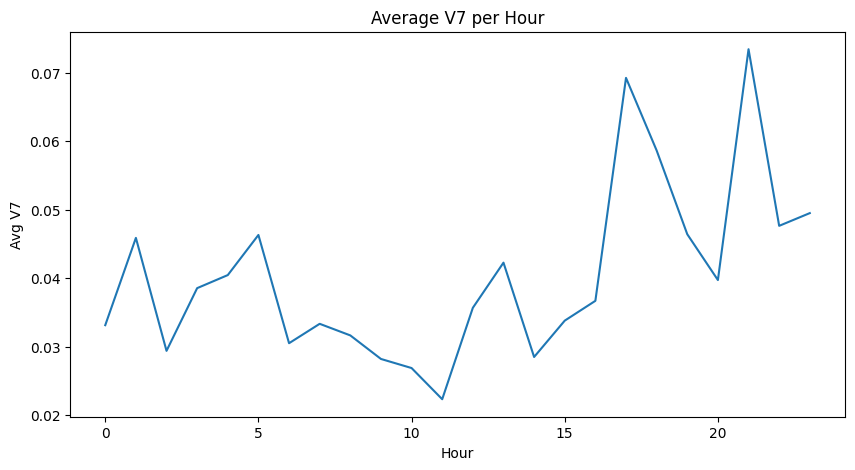

In [37]:
hourly_v7 = train.groupby(['V5_hour'])['V7'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_v7, x='V5_hour', y='V7')
plt.title("Average V7 per Hour")
plt.xlabel("Hour")
plt.ylabel("Avg V7")
plt.show()


**The feature V7 does not exhibit significant variation over time of day. Despite fluctuations in fraud rate by hour and weekday/weekend, V7 remains relatively stable, implying that its influence on fraud detection may not be heavily time-dependent**

C:\Users\Nayak\AppData\Local\Temp\ipykernel_3952\2776103150.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train[train['Target'] == 0], x='V6', label='Not Fraud', shade=True)
C:\Users\Nayak\AppData\Local\Temp\ipykernel_3952\2776103150.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train[train['Target'] == 1], x='V6', label='Fraud', shade=True)


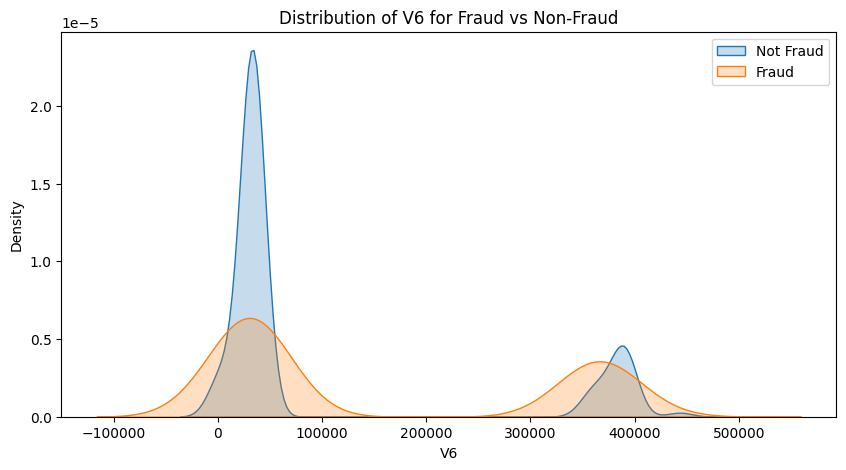

In [38]:
#Distribution of V6 for Fraud vs Non-Fraud

plt.figure(figsize=(10,5))
sns.kdeplot(data=train[train['Target'] == 0], x='V6', label='Not Fraud', shade=True)
sns.kdeplot(data=train[train['Target'] == 1], x='V6', label='Fraud', shade=True)
plt.title("Distribution of V6 for Fraud vs Non-Fraud")
plt.legend()
plt.show()

In [39]:
train.head(10)

,V1,V2,V3,V4,V6,V7,V8,V9,V10,Target,...,V5_year,V5_month,V5_day,V5_hour,V5_min,V5_sec,is_weekend,hour_weekend,amount_bin,amount_weekend
0,1872,229526,2062082,485.69445,376474,0,1,425559,44707,0,...,2020,3,20,22,51,30,False,22_0,High,High_False
1,5533,244499,1459012,393.45200,33227,0,4793,248012,39453,0,...,2020,4,28,7,17,12,False,7_0,High,High_False
2,5278,311877,0,375.75000,0,5,5631,166256,237664,0,...,2020,8,15,4,11,43,True,4_1,High,High_True
3,24,279685,0,6.97225,0,2,7188,354924,99032,0,...,2020,6,26,1,11,42,False,1_0,Low,Low_False
4,449,104689,0,16.70000,0,2,7236,354924,63422,0,...,2020,9,15,10,11,6,False,10_0,Mid-Low,Mid-Low_False
5,449,15835,0,15.03000,0,2,7236,354924,63422,0,...,2020,4,27,3,11,20,False,3_0,Mid-Low,Mid-Low_False
6,6757,65730,0,18.78750,0,2,8649,158648,366146,0,...,2020,7,16,10,11,46,False,10_0,Mid-Low,Mid-Low_False
7,1381,420679,0,375.75000,0,5,8650,100097,394846,0,...,2020,8,13,6,11,14,False,6_0,High,High_False
8,1381,6634,0,125.25000,0,5,8650,100097,394846,0,...,2020,4,7,21,11,5,False,21_0,High,High_False
9,1381,320776,0,41.75000,0,5,8650,100097,394846,0,...,2020,8,30,2,11,15,True,2_1,Mid-High,Mid-High_True


In [40]:
train.drop(columns=['V3'],inplace=True)

In [41]:
train.drop(columns=['V6'],inplace=True)

In [42]:
train.drop(columns=['V13'],inplace=True)

In [43]:
train.drop(columns=['V5_year', 'V2', 'V8', 'V9', 'V10'],inplace=True)

In [44]:
# Columns to encode
categorical_cols = ['hour_weekend', 'amount_weekend', 'amount_bin']

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to each column
for col in categorical_cols:
    train[col] = le.fit_transform(train[col])

In [45]:
train.head()

,V1,V4,V7,Target,V5_month,V5_day,V5_hour,V5_min,V5_sec,is_weekend,hour_weekend,amount_bin,amount_weekend
0,1872,485.69445,0,0,3,20,22,51,30,False,28,0,0
1,5533,393.45200,0,0,4,28,7,17,12,False,42,0,0
2,5278,375.75000,5,0,8,15,4,11,43,True,37,0,1
3,24,6.97225,2,0,6,26,1,11,42,False,22,1,2
4,449,16.70000,2,0,9,15,10,11,6,False,2,3,6


In [46]:
train_helper.head()

,V1,V3,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID1626,EID1390067,B170291,A,2017-11-18 05:26:58,117.167.140.162,875,1525792,77.55,NaN
1,CUID2932,EID397864,B170291,A,2017-11-18 05:26:59,133.193.46.52,875,471293,-25.85,NaN
2,CUID7230,EID315534,B1827073,B,2017-11-18 05:27:02,127.75.140.137,875,825535,NaN,373.50
3,CUID1588,EID1724187,B170291,A,2017-11-18 05:27:30,120.210.191.123,875,2136427,-23.50,NaN
4,CUID3625,EID637357,B2356022,B,2017-11-18 05:27:55,127.75.145.110,875,825535,169.20,400.06


In [47]:
train_helper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231200 entries, 0 to 1231199
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   V1      1231200 non-null  object 
 1   V3      1231200 non-null  object 
 2   V14     1231200 non-null  object 
 3   V15     1231200 non-null  object 
 4   V16     1231200 non-null  object 
 5   V17     1231200 non-null  object 
 6   V18     1231200 non-null  int64  
 7   V19     1231200 non-null  int64  
 8   V20     854813 non-null   float64
 9   V21     234512 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 93.9+ MB


In [48]:
train_helper.isnull().sum()

V1          0
V3          0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20    376387
V21    996688
dtype: int64

In [49]:
def column_info(train, features):
    categorical_features = []
    for feature in features:
        unique_values = train_helper[feature].unique()
        missing_percentage = train_helper[feature].isnull().mean() * 100
        num_unique_values = len(unique_values)
        is_categorical = train[feature].dtype == 'object' or train[feature].nunique() < 20

        print(f"Column: '{feature}'")
        print(f"Number of unique values: {num_unique_values}")
        print("Unique values:")
        print(unique_values)
        print(f"Missing value percentage: {missing_percentage:.2f}%")
        print(f"Categorical: {'Yes' if is_categorical else 'No'}")
        print("-----------------------------------------------------------------------------------------")

        if is_categorical:
            categorical_features.append(feature)

    return categorical_features

# Example usage:
# Assuming you have a DataFrame named 'train' and a list of feature names named 'features'
features = train_helper.columns
categorical_features = column_info(train_helper, features)

Column: 'V1'
Number of unique values: 3671
Unique values:
['CUID1626' 'CUID2932' 'CUID7230' ... 'CUID3789' 'CUID716' 'CUID1944']
Missing value percentage: 0.00%
Categorical: Yes
-----------------------------------------------------------------------------------------
Column: 'V3'
Number of unique values: 856277
Unique values:
['EID1390067' 'EID397864' 'EID315534' ... 'EID2048672' 'EID980064'
 'EID1769567']
Missing value percentage: 0.00%
Categorical: Yes
-----------------------------------------------------------------------------------------
Column: 'V14'
Number of unique values: 87
Unique values:
['B170291' 'B1827073' 'B2356022' 'B4995' 'B2226330' 'B95406' 'B126692'
 'B49608' 'B100422' 'B1765161' 'B2187687' 'B1791139' 'B119602' 'B2223271'
 'B769' 'B80372' 'B1762707' 'B113650' 'B167243' 'B4605' 'B123131'
 'B1788264' 'B123076' 'B125646' 'B1785853' 'B170000' 'B78338' 'B113264'
 'B55' 'B19' 'B95378' 'B100213' 'B79220' 'B95061' 'B113594' 'B1790487'
 'B1826202' 'B122302' 'B122768' 'B239060

In [50]:
train_helper.describe()

,V18,V19,V20,V21
count,1.231200e+06,1.231200e+06,854813.000000,234512.000000
mean,8.542592e+02,1.068001e+06,76.761827,138.329496
std,1.096927e+02,6.874733e+05,53.523005,134.169109
min,0.000000e+00,0.000000e+00,-235.000000,0.830000
25%,8.750000e+02,4.987950e+05,42.300000,46.480000
50%,8.750000e+02,1.058753e+06,79.900000,88.810000
75%,8.750000e+02,1.777813e+06,110.450000,192.560000
max,9.430000e+02,2.391210e+06,235.000000,830.000000


In [51]:
train_helper.drop(columns=['V3', 'V21'],inplace=True,axis=1)

In [52]:
train_helper.head()

,V1,V14,V15,V16,V17,V18,V19,V20
0,CUID1626,B170291,A,2017-11-18 05:26:58,117.167.140.162,875,1525792,77.55
1,CUID2932,B170291,A,2017-11-18 05:26:59,133.193.46.52,875,471293,-25.85
2,CUID7230,B1827073,B,2017-11-18 05:27:02,127.75.140.137,875,825535,NaN
3,CUID1588,B170291,A,2017-11-18 05:27:30,120.210.191.123,875,2136427,-23.50
4,CUID3625,B2356022,B,2017-11-18 05:27:55,127.75.145.110,875,825535,169.20


In [53]:
train_helper['V20'] = train_helper['V20'].fillna(train_helper['V20'].mean())

In [54]:
# Columns to clean
columns_to_clean2 = ['V1', 'V14']

# Remove alphabetic characters from the specified columns
train_helper[columns_to_clean2] = train_helper[columns_to_clean2].applymap(lambda x: ''.join(filter(str.isdigit, str(x))))

C:\Users\Nayak\AppData\Local\Temp\ipykernel_3952\3105217846.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_helper[columns_to_clean2] = train_helper[columns_to_clean2].applymap(lambda x: ''.join(filter(str.isdigit, str(x))))


In [55]:
# Columns to Clean 
columnns_to_clean2 = ['V1', 'V14']

train_helper[columnns_to_clean2] = train_helper[columnns_to_clean2].apply(pd.to_numeric)

In [56]:
train_helper['V16'] = pd.to_datetime(train_helper['V16']);

In [57]:
train_helper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231200 entries, 0 to 1231199
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   V1      1231200 non-null  int64         
 1   V14     1231200 non-null  int64         
 2   V15     1231200 non-null  object        
 3   V16     1231200 non-null  datetime64[ns]
 4   V17     1231200 non-null  object        
 5   V18     1231200 non-null  int64         
 6   V19     1231200 non-null  int64         
 7   V20     1231200 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 75.1+ MB


In [58]:
train_helper["V16_year"] = train_helper["V16"].dt.year
train_helper["V16_month"] = train_helper["V16"].dt.month
train_helper["V16_day"] = train_helper["V16"].dt.day
train_helper["V16_hour"] = train_helper["V16"].dt.hour
train_helper["V16_min"] = train_helper["V16"].dt.minute
train_helper["V16_sec"] = train_helper["V16"].dt.second
train_helper['is_weekend_V16'] = train_helper['V16'].dt.weekday >= 5

In [59]:
train_helper['V15'] = encoder.fit_transform(train_helper['V15'])

In [60]:
train_helper.head()

,V1,V14,V15,V16,V17,V18,V19,V20,V16_year,V16_month,V16_day,V16_hour,V16_min,V16_sec,is_weekend_V16
0,1626,170291,0,2017-11-18 05:26:58,117.167.140.162,875,1525792,77.550000,2017,11,18,5,26,58,True
1,2932,170291,0,2017-11-18 05:26:59,133.193.46.52,875,471293,-25.850000,2017,11,18,5,26,59,True
2,7230,1827073,1,2017-11-18 05:27:02,127.75.140.137,875,825535,76.761827,2017,11,18,5,27,2,True
3,1588,170291,0,2017-11-18 05:27:30,120.210.191.123,875,2136427,-23.500000,2017,11,18,5,27,30,True
4,3625,2356022,1,2017-11-18 05:27:55,127.75.145.110,875,825535,169.200000,2017,11,18,5,27,55,True


In [61]:
train_helper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231200 entries, 0 to 1231199
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   V1              1231200 non-null  int64         
 1   V14             1231200 non-null  int64         
 2   V15             1231200 non-null  int32         
 3   V16             1231200 non-null  datetime64[ns]
 4   V17             1231200 non-null  object        
 5   V18             1231200 non-null  int64         
 6   V19             1231200 non-null  int64         
 7   V20             1231200 non-null  float64       
 8   V16_year        1231200 non-null  int32         
 9   V16_month       1231200 non-null  int32         
 10  V16_day         1231200 non-null  int32         
 11  V16_hour        1231200 non-null  int32         
 12  V16_min         1231200 non-null  int32         
 13  V16_sec         1231200 non-null  int32         
 14  is_weekend_V16  12

In [62]:
# Split the IP address into 4 parts and assign to new columns
train_helper[['V17_IP_A', 'V17_IP_B', 'V17_IP_C', 'V17_IP_D']] = train_helper['V17'].str.split('.', expand=True)

# Convert to integers for numerical operations
train_helper[['V17_IP_A', 'V17_IP_B', 'V17_IP_C', 'V17_IP_D']] = train_helper[['V17_IP_A', 'V17_IP_B', 'V17_IP_C', 'V17_IP_D']].astype(int)

In [63]:
train_helper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231200 entries, 0 to 1231199
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   V1              1231200 non-null  int64         
 1   V14             1231200 non-null  int64         
 2   V15             1231200 non-null  int32         
 3   V16             1231200 non-null  datetime64[ns]
 4   V17             1231200 non-null  object        
 5   V18             1231200 non-null  int64         
 6   V19             1231200 non-null  int64         
 7   V20             1231200 non-null  float64       
 8   V16_year        1231200 non-null  int32         
 9   V16_month       1231200 non-null  int32         
 10  V16_day         1231200 non-null  int32         
 11  V16_hour        1231200 non-null  int32         
 12  V16_min         1231200 non-null  int32         
 13  V16_sec         1231200 non-null  int32         
 14  is_weekend_V16  12

In [64]:
train_helper.drop(columns=['V17'],inplace=True,axis=1)

In [65]:
train_helper.drop(columns=['V16'],inplace=True,axis=1)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233633 entries, 0 to 233632
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   V1              233633 non-null  int64  
 1   V4              233633 non-null  float64
 2   V7              233633 non-null  int32  
 3   Target          233633 non-null  int64  
 4   V5_month        233633 non-null  int32  
 5   V5_day          233633 non-null  int32  
 6   V5_hour         233633 non-null  int32  
 7   V5_min          233633 non-null  int32  
 8   V5_sec          233633 non-null  int32  
 9   is_weekend      233633 non-null  bool   
 10  hour_weekend    233633 non-null  int32  
 11  amount_bin      233633 non-null  int32  
 12  amount_weekend  233633 non-null  int32  
dtypes: bool(1), float64(1), int32(9), int64(2)
memory usage: 13.6 MB


In [67]:
merged_train=pd.read_csv('merged_train.csv')

In [80]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import numpy as np

# ✅ Features and target
X = merged_train.drop('Target', axis=1)
y = merged_train['Target']

# ✅ Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# ✅ Individual models
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=4,
    random_state=42,
    class_weight='balanced'
)

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    random_state=42
)

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

# ✅ Models to evaluate (with ensemble added)
models = {
    'Random Forest': rf,
    'XGBoost': xgb,
    'Logistic Regression': lr,
}

# ✅ Train and Evaluate
for name, model in models.items():
    print(f"\n🔍 Training {name}...")
    model.fit(X_train_res, y_train_res)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Print evaluation metrics
    print(f"✅ Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"✅ F1 Score (macro): {f1_score(y_test, preds, average='macro'):.4f}")
    print(f"✅ F1 Score (weighted): {f1_score(y_test, preds, average='weighted'):.4f}")
    print(f"✅ F1 Score (class 1): {f1_score(y_test, preds, pos_label=1):.4f}")
    print(f"✅ Precision (class 1): {precision_score(y_test, preds, pos_label=1):.4f}")
    print(f"✅ Recall (class 1): {recall_score(y_test, preds, pos_label=1):.4f}")
    
    if probs is not None and len(np.unique(y)) == 2:
        print(f"✅ ROC AUC: {roc_auc_score(y_test, probs):.4f}")
        
    print("📊 Classification Report:")
    print(classification_report(y_test, preds))


🔍 Training Random Forest...
✅ Accuracy: 0.9952
✅ F1 Score (macro): 0.8275
✅ F1 Score (weighted): 0.9957
✅ F1 Score (class 1): 0.6575
✅ Precision (class 1): 0.5429
✅ Recall (class 1): 0.8333
✅ ROC AUC: 0.9753
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46436
           1       0.54      0.83      0.66       258

    accuracy                           1.00     46694
   macro avg       0.77      0.91      0.83     46694
weighted avg       1.00      1.00      1.00     46694


🔍 Training XGBoost...


C:\Users\Nayak\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:46:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.9838
✅ F1 Score (macro): 0.6835
✅ F1 Score (weighted): 0.9884
✅ F1 Score (class 1): 0.3752
✅ Precision (class 1): 0.2384
✅ Recall (class 1): 0.8798
✅ ROC AUC: 0.9650
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     46436
           1       0.24      0.88      0.38       258

    accuracy                           0.98     46694
   macro avg       0.62      0.93      0.68     46694
weighted avg       1.00      0.98      0.99     46694


🔍 Training Logistic Regression...
✅ Accuracy: 0.6877
✅ F1 Score (macro): 0.4174
✅ F1 Score (weighted): 0.8098
✅ F1 Score (class 1): 0.0206
✅ Precision (class 1): 0.0105
✅ Recall (class 1): 0.5930
✅ ROC AUC: 0.7079
📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.81     46436
           1       0.01      0.59      0.02       258

    accuracy                           0.69     46694
   macro a

C:\Users\Nayak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, classification_report
)
from xgboost import XGBClassifier

# ✅ Encode object-type columns using LabelEncoder
label_encoders = {}
for col in merged_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    merged_train[col] = le.fit_transform(merged_train[col])
    label_encoders[col] = le  # optional: store encoder for inverse transform later

# ✅ Features and target
X = merged_train.drop('Target', axis=1)
y = merged_train['Target']

# ✅ Normalize features (optional)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Initialize XGBoost with tuned parameters
best_xgb = XGBClassifier(
    learning_rate=0.3,
    max_depth=6,
    n_estimators=200,
    scale_pos_weight=15,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# ✅ Train the model
best_xgb.fit(X_train, y_train)

# ✅ Predict and evaluate
preds = best_xgb.predict(X_test)

print(f"✅ Accuracy: {accuracy_score(y_test, preds):.4f}")
print(f"✅ F1 Score (macro): {f1_score(y_test, preds, average='macro'):.4f}")
print(f"✅ F1 Score (weighted): {f1_score(y_test, preds, average='weighted'):.4f}")
print(f"✅ F1 Score (class 1): {f1_score(y_test, preds, pos_label=1):.4f}")
print(f"✅ Precision (class 1): {precision_score(y_test, preds, pos_label=1):.4f}")
print(f"✅ Recall (class 1): {recall_score(y_test, preds, pos_label=1):.4f}")
print("📊 Classification Report:\n")
print(classification_report(y_test, preds))


C:\Users\Nayak\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:47:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.9982
✅ F1 Score (macro): 0.9179
✅ F1 Score (weighted): 0.9982
✅ F1 Score (class 1): 0.8367
✅ Precision (class 1): 0.8607
✅ Recall (class 1): 0.8140
📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46436
           1       0.86      0.81      0.84       258

    accuracy                           1.00     46694
   macro avg       0.93      0.91      0.92     46694
weighted avg       1.00      1.00      1.00     46694

